# Team selection
We want to choose our dream team. The rules for choosing are:

* One player in each position - PG, SG, SF, PF, C.
* One player only from each of the last five decades - 2010's, 2000's, 1990's, 1980's, 1970's.

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data

In [4]:
players_df = pd.read_csv('../data/interim/player_data_cleaned.csv', header=0, index_col=0, sep=',')
players_df.head()

,height,weight,collage,born,birth_city,birth_state,decades,positions,G,MP,...,WS,TRB,FG%,2P%,3P%,FT%,APG,PPG,PFPG,WS48
Player,,,,,,,,,,,,,,,,,,,,,
Freddie Lewis,188.0,88.0,Eastern Kentucky University,1921.0,Brooklyn,New York,['70s'],['PG'],32.0,552.0,...,0.5,47.0,0.407035,0.407035,0.000000,0.805195,1.750000,7.000000,1.812500,0.043478
Bob Cousy*,185.0,79.0,College of the Holy Cross,1928.0,New York,New York,['70s'],['PG'],7.0,34.0,...,0.1,5.0,0.333333,0.333333,0.000000,1.000000,1.428571,0.714286,1.571429,0.141176
Richie Guerin*,193.0,88.0,Iona College,1932.0,New York,New York,['70s'],['SG'],8.0,64.0,...,-0.1,2.0,0.272727,0.272727,0.000000,1.000000,1.500000,0.875000,1.125000,-0.075000
Jim Paxson,198.0,90.0,University of Dayton,1932.0,Pennville,Indiana,"['80s', '90s']","['SG', 'PG']",829.0,22158.0,...,55.0,1638.0,0.496448,0.510195,0.225877,0.808320,2.866104,13.927624,1.827503,0.119144
Hot Rod,193.0,83.0,NaN,1935.0,NaN,NaN,"['80s', '90s']","['C', 'PF']",887.0,26327.0,...,70.6,5998.0,0.480146,0.481075,0.105263,0.725792,1.794814,11.030440,2.540023,0.128720


## Explore dataset
Lets see if there are any correlations in the dataset.

In [6]:
cols = players_df.columns[8:]

Lets visualise the Spearman rank correlation coefficient. Note that we use this rather than a linear correlation coefficient since a rank-based will capture non-linear correlations.

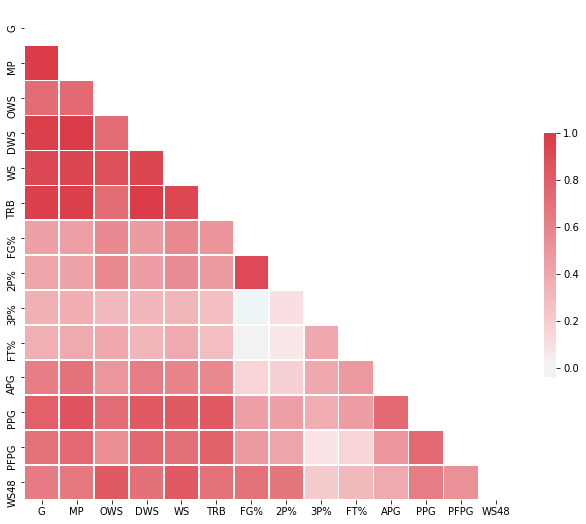

In [13]:
# compute the correlation matrix
corr = players_df.loc[:, cols].corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

We can also visualise the data itself on a pair plot.

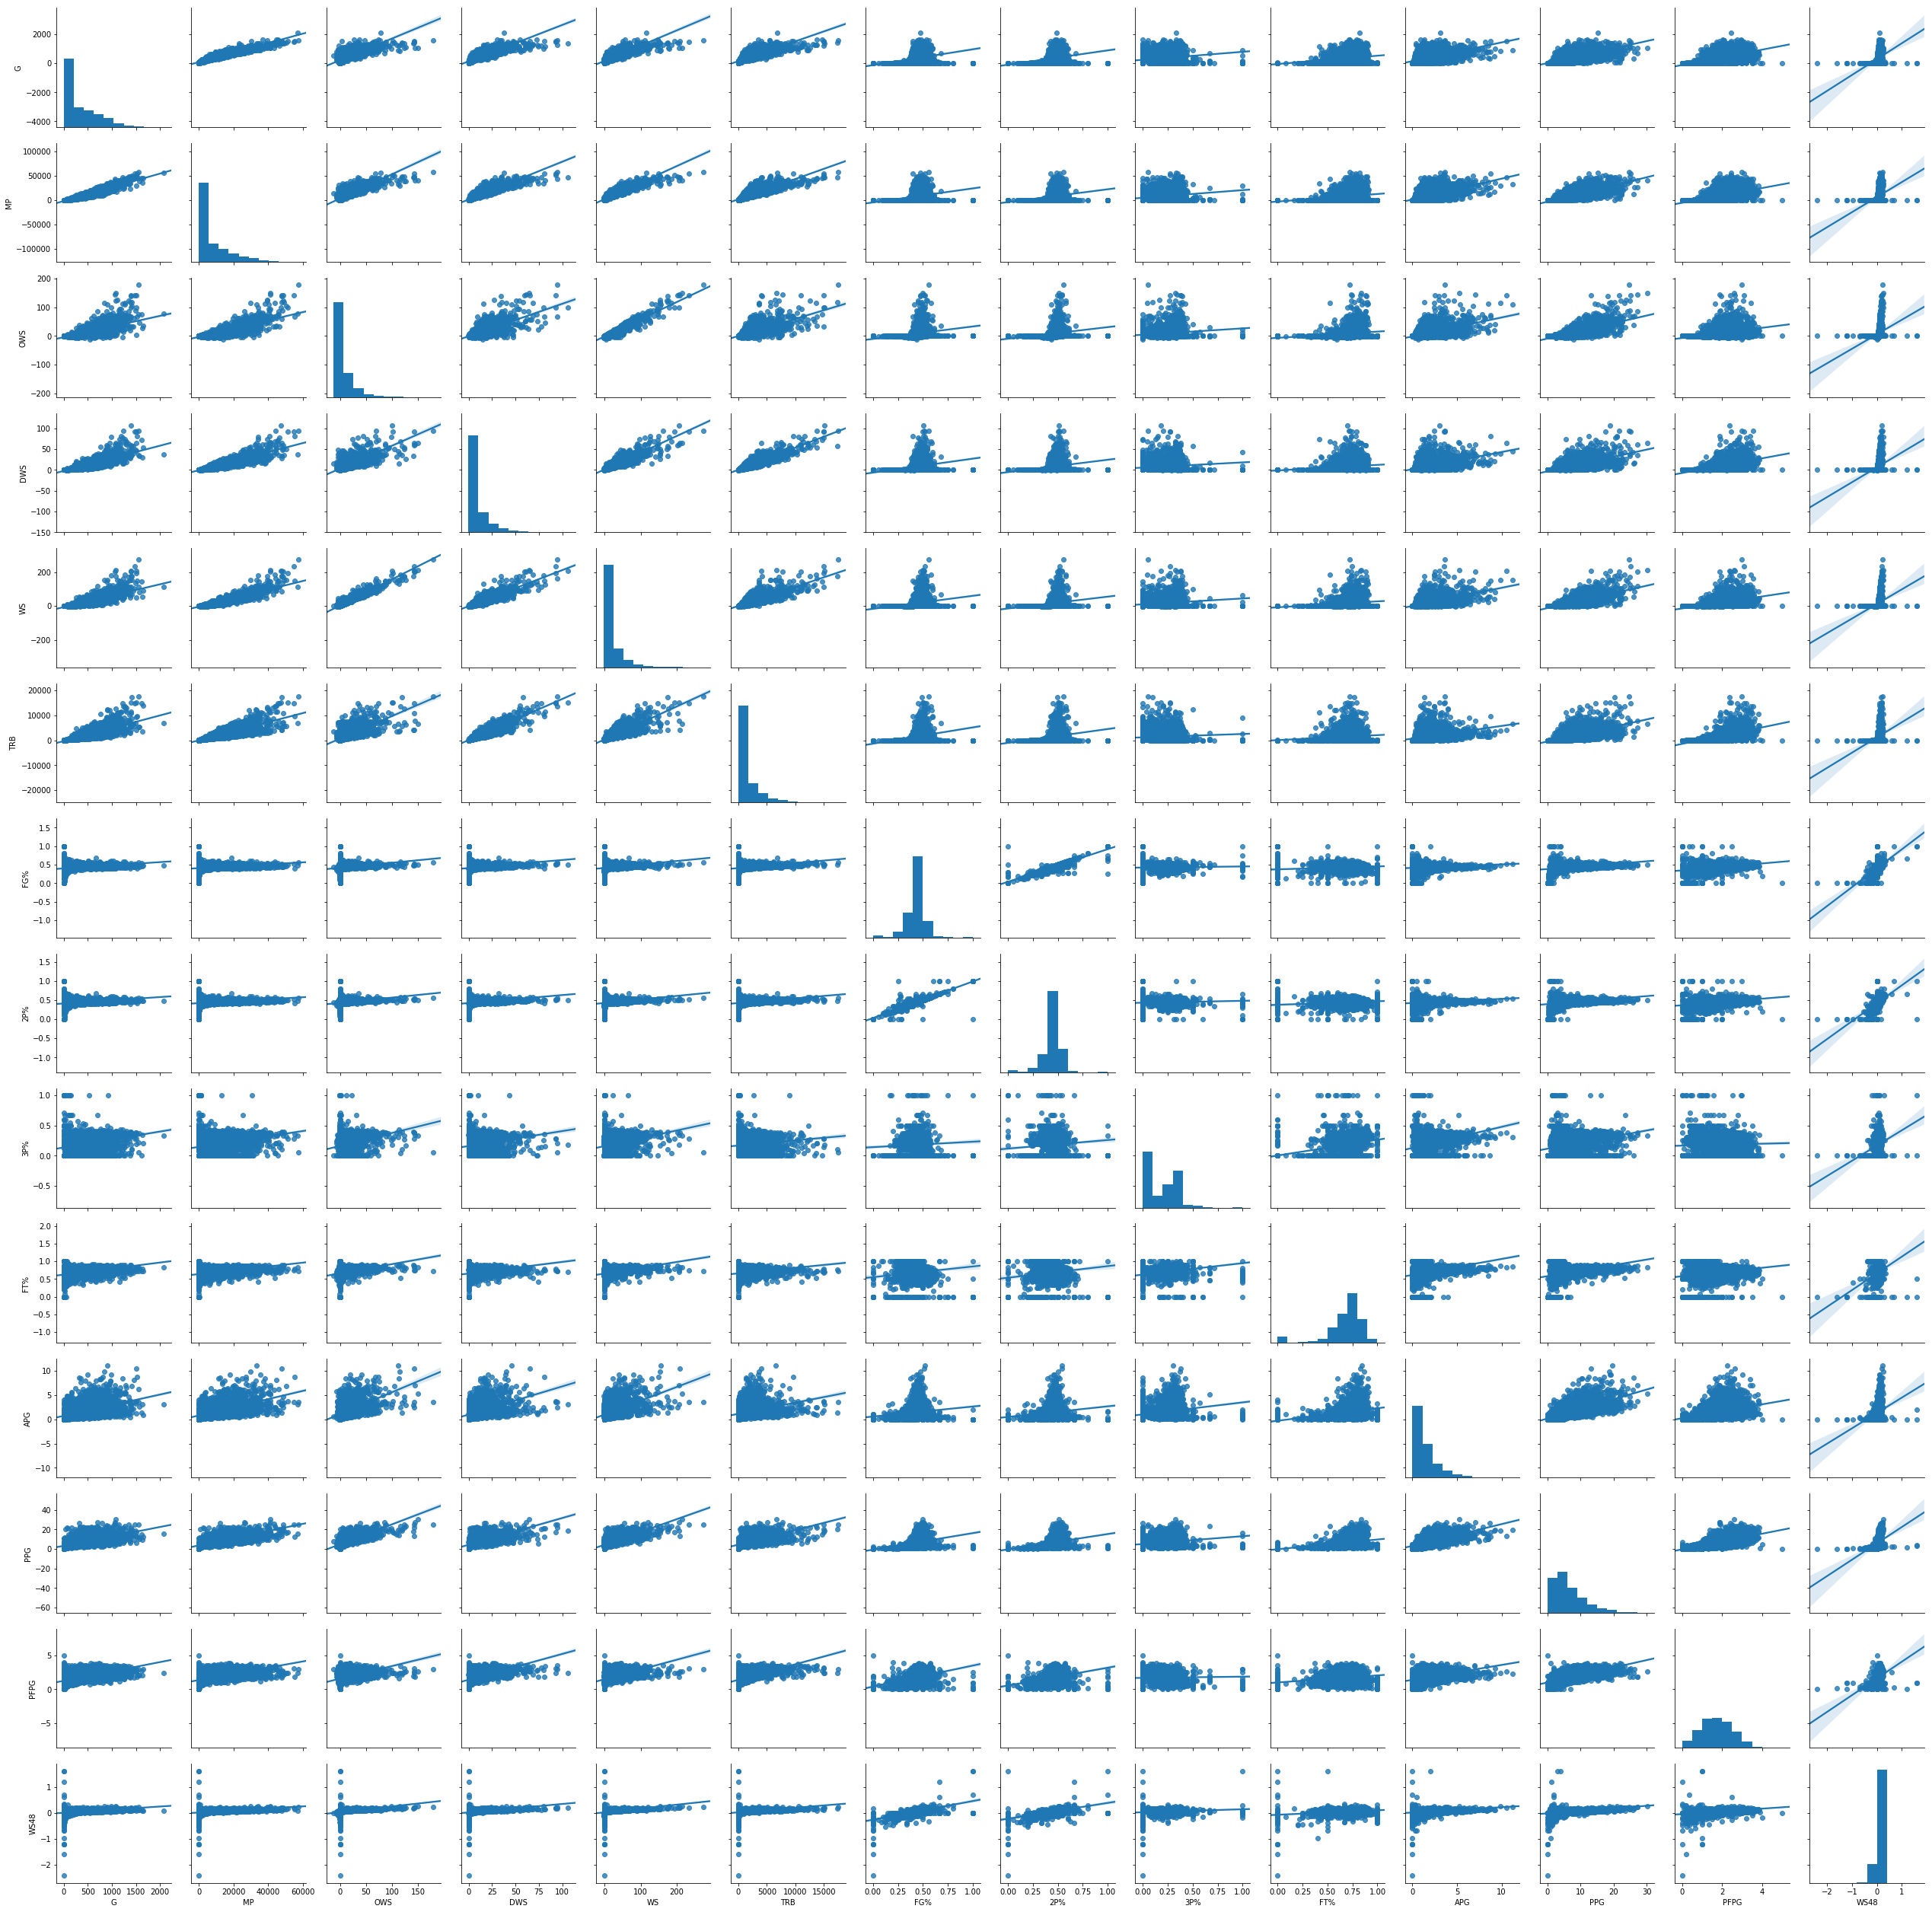

In [5]:
sns.pairplot(players_df, vars=cols , kind='reg')
plt.show()

## Choosing the dream team
Lets move on to choosing our dream team. The simplest approach is to select or create a metric by which to rank players, and select the five player which maximise this metric with respect to the rules stated above. For our first pass we will use win shares per 48 minutes, which measures how much a player contributes to a team's win on average per game (a game lasts 48 minutes). Lets look at the WS48 feature in more detail.

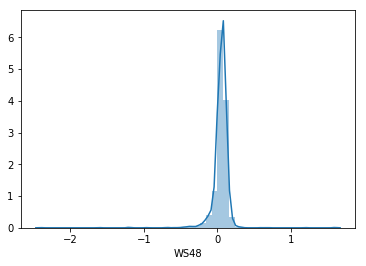

In [15]:
sns.distplot(players_df['WS48'])
plt.show()

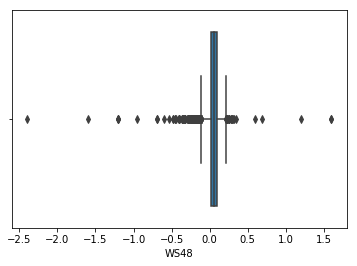

In [18]:
sns.boxplot(x='WS48', data=players_df)
plt.show()

The bulk of the distribution is around zero, with some outliers ate either end. Next lets look at the top players by WS48. Here are the top 20 players.

In [29]:
players_df.sort_values(by='WS48', ascending=False).iloc[:20, 6:]

,decades,positions,G,MP,OWS,DWS,WS,TRB,FG%,2P%,3P%,FT%,APG,PPG,PFPG,WS48
Player,,,,,,,,,,,,,,,,
Chad Gallagher,['90s'],['C'],2.0,3.0,0.1,0.0,0.1,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.600000
Tyson Wheeler,['90s'],['PG'],1.0,3.0,0.1,0.0,0.1,0.0,1.000000,0.000000,1.000000,0.500000,2.000000,4.000000,1.000000,1.600000
Cedric Lewis,['90s'],['C'],3.0,4.0,0.0,0.0,0.1,2.0,0.666667,0.666667,0.000000,0.000000,0.000000,1.333333,0.000000,1.200000
Cozell McQueen,['80s'],['PF'],3.0,7.0,0.1,0.0,0.1,8.0,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.333333,0.685714
Bob Miller,['80s'],['PF'],2.0,8.0,0.0,0.0,0.1,5.0,0.666667,0.666667,0.000000,0.000000,0.500000,2.000000,2.500000,0.600000
Alvin Heggs,['90s'],['SF'],4.0,14.0,0.1,0.0,0.1,2.0,0.600000,0.600000,0.000000,0.666667,0.000000,2.000000,0.000000,0.342857
Korleone Young,['90s'],['SF'],3.0,15.0,0.1,0.0,0.1,4.0,0.500000,0.666667,0.250000,1.000000,0.333333,4.333333,1.000000,0.320000
Boban Marjanovic,['10s'],['C'],89.0,801.0,3.5,1.7,5.1,324.0,0.578431,0.578431,0.000000,0.779070,0.337079,5.483146,0.887640,0.305618
Geno Carlisle,['00s'],['SG'],6.0,16.0,0.1,0.0,0.1,1.0,0.666667,0.666667,0.000000,0.666667,0.166667,1.333333,0.166667,0.300000
